# FYS-STK4155 week 37

## Exercise 1
**a)** We do not need to center the $y$-values since these are of a similar scale.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [3]:
n = 100
x = np.linspace(-2, 2, n)
y = 2 - x + 5*x**2

In [4]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        X[:, 0] = 1.0
        for i in range(1,p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(1,p+1):
            X[:,i-1] = x**i
    return X

In [5]:
X = polynomial_features(x, 2)

In [6]:
# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = np.mean(y)
y_centered = y - y_mean

## Exercise 2

Ordinary least squares: $ \frac{2}{n} \left(X^T X \theta - X^T y\right) $

Ridge: $ \frac{2}{n} \left( X^T X \theta - X^T y \right) + \lambda 2 \theta $

## Exercise 3
**a)**

In [9]:
# Set regularization parameter, either a single value or a vector of values
lam = 0.001


# Analytical form for OLS and Ridge solution: theta_Ridge = (X^T X + lambda * I)^{-1} X^T y and theta_OLS = (X^T X)^{-1} X^T y
I = np.eye((X_norm.T@X_norm).shape[0]) # I same shape as X^T X
theta_closed_formRidge = np.linalg.inv( X_norm.T @ X_norm + lam * I ) @ X_norm.T @ y_centered
theta_closed_formOLS = np.linalg.inv(X_norm.T @ X_norm) @ X_norm.T @ y_centered

print("Closed-form Ridge coefficients:", theta_closed_formRidge)
print("Closed-form OLS coefficients:", theta_closed_formOLS)

Closed-form Ridge coefficients: [-1.1662942   6.08233604]
Closed-form OLS coefficients: [-1.16630586  6.08239686]


**b)**

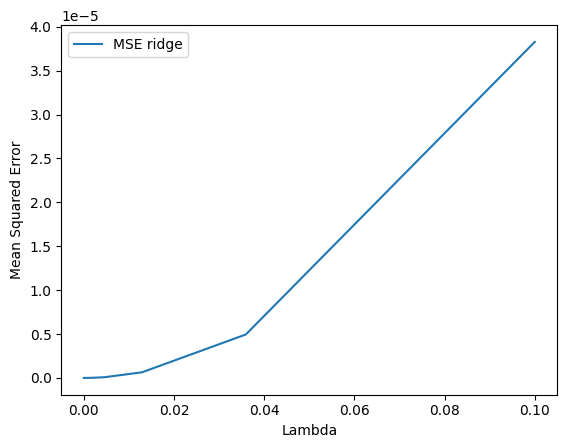

In [11]:
from sklearn.metrics import mean_squared_error


lambdas = np.logspace(-5, -1, 10)
mse_ridge = []
mse_ols = []

for lmb in lambdas:
    I = np.eye((X_norm.T@X_norm).shape[0]) # I same shape as X^T X
    theta_closed_formRidge = np.linalg.inv( X_norm.T @ X_norm + lmb * I ) @ X_norm.T @ y_centered
    mse_r = mean_squared_error(y_centered, X_norm @ theta_closed_formRidge)
    mse_ridge.append(mse_r)


plt.plot(lambdas, mse_ridge, label='MSE ridge')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.legend()

## Exercise 4
**a)** When I set the learning rate too high (e.g. 0.5 here) it misses the minimum of the cost function. When I set it too small the loop stopped before the local minimum was found. A too small learning rate means we start with steps that are too tiny to reach the minimum within our predefined number of runs. Too large a learning rate can lead to overshooting the minumum and getting lost. 

**b)** Define the stopping criterion when $\eta g $ is less than the predefined $\epsilon$ 

In [13]:
# Gradient descent parameters, learning rate eta first
eta = 0.1
# Then number of iterations
num_iters = 1000

# Initialize weights for gradient descent
theta = np.zeros(2)

theta_gdOLS =  theta.copy()
theta_gdRidge = theta.copy()
eps = 1e-4

t=0
grad_OLS = 2.0/n * (X_norm.T @  X_norm @ (theta_gdOLS) - X_norm.T @ y_centered)
grad_Ridge = 2.0/n* (X_norm.T @ X_norm @ (theta_gdRidge) - X_norm.T @ y_centered)+ 2*lam*theta_gdRidge

# Gradient descent loop
while t <= num_iters and len(eta*grad_OLS) > eps and len(eta*grad_Ridge)> eps:
    # Compute gradients for OSL and Ridge
    grad_OLS = 2.0/n * (X_norm.T @  X_norm @ (theta_gdOLS) - X_norm.T @ y_centered)
    grad_Ridge = 2.0/n* (X_norm.T @ X_norm @ (theta_gdRidge) - X_norm.T @ y_centered)+ 2*lam*theta_gdRidge
    # Update parameters theta
    theta_gdOLS += - eta*grad_OLS
    theta_gdRidge += - eta * grad_Ridge
    t+=1

# After the loop, theta contains the fitted coefficients
# theta_gdOLS = ?
# theta_gdRidge = ?
print("Gradient Descent OLS coefficients:", theta_gdOLS)
print("Gradient Descent Ridge coefficients:", theta_gdRidge)


Gradient Descent OLS coefficients: [-1.16630586  6.08239686]
Gradient Descent Ridge coefficients: [-1.16514072  6.07632054]


## Exercise 5

The learned coefficients are close for both OLS and Ridge with gradient descent, but Ridge is closest to the correct coefficients. 

In [15]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Define dataset size
n_samples = 100
n_features = 10

# Define true coefficients (sparse linear relationship)
theta_true = np.array([5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0])

# Generate feature matrix X (n_samples x n_features) with random values
X = np.random.randn(n_samples, n_features)  # standard normal distribution

# Generate target values y with a linear combination of X and theta_true, plus noise
noise = 0.5 * np.random.randn(n_samples)  # Gaussian noise
y = X @ theta_true + noise

In [16]:
# Gradient descent parameters, learning rate eta first
eta = 0.1
# Then number of iterations
num_iters = 1000

# Initialize weights for gradient descent
theta = np.zeros(10)

theta_gdOLS =  theta.copy()
theta_gdRidge = theta.copy()
eps = 1e-4

t=0
# Gradient descent loop
while t <= num_iters and len(eta*grad_OLS) > eps and len(eta*grad_Ridge)> eps:
    # Compute gradients for OSL and Ridge
    grad_OLS = 2.0/n * (X.T @  X @ (theta_gdOLS) - X.T @ y)
    grad_Ridge = 2.0/n* (X.T @ X @ (theta_gdRidge) - X.T @ y)+2*lam*theta_gdRidge
    # Update parameters theta
    theta_gdOLS += - eta*grad_OLS
    theta_gdRidge += - eta * grad_Ridge
    t+=1

# After the loop, theta contains the fitted coefficients
# theta_gdOLS = ?
# theta_gdRidge = ?
print("Gradient Descent OLS coefficients:", theta_gdOLS)
print("Gradient Descent Ridge coefficients:", theta_gdRidge)

Gradient Descent OLS coefficients: [ 5.00905318e+00 -3.00383337e+00 -1.62718294e-02  1.44819819e-01
 -7.16006510e-02 -4.29656382e-02  2.05558117e+00  1.97583716e-03
  4.11922237e-02 -5.10225177e-02]
Gradient Descent Ridge coefficients: [ 5.00410898e+00 -2.99968373e+00 -1.63065915e-02  1.45477818e-01
 -7.25435409e-02 -4.37776623e-02  2.05285140e+00  2.26563823e-03
  4.02214213e-02 -5.10893259e-02]
